In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5),'axes.facecolor':'white', 'figure.facecolor':'white',})
sns.set_palette("magma")
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

solar_list = []
wind_list = []
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        if file.startswith('solar'):
            solar_list.append(pd.read_csv(os.getcwd()+'/'+file).add_prefix(f"{file.split('.')[0]}_").rename({f"{file.split('.')[0]}_NAME":'State'},axis=1).set_index('State'))
        if file.startswith('wind'):
            wind_list.append(pd.read_csv(os.getcwd()+'/'+file).add_prefix(f"{file.split('.')[0]}_").rename({f"{file.split('.')[0]}_NAME":'State'},axis=1).set_index('State'))
            # print(file.split('.')[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
solar['SSP5-8.5 Years 41-70 vs Current PV Capacity Factor'] = solar['solar_ssp5_41_70_PV Capacity Factor_mean'] - solar['solar_normal_PV Capacity Factor_mean']
solar['SSP2-4.5 Years 41-70 vs Current PV Capacity Factor'] = solar['solar_ssp2_41_70_PV Capacity Factor_mean'] - solar['solar_normal_PV Capacity Factor_mean']

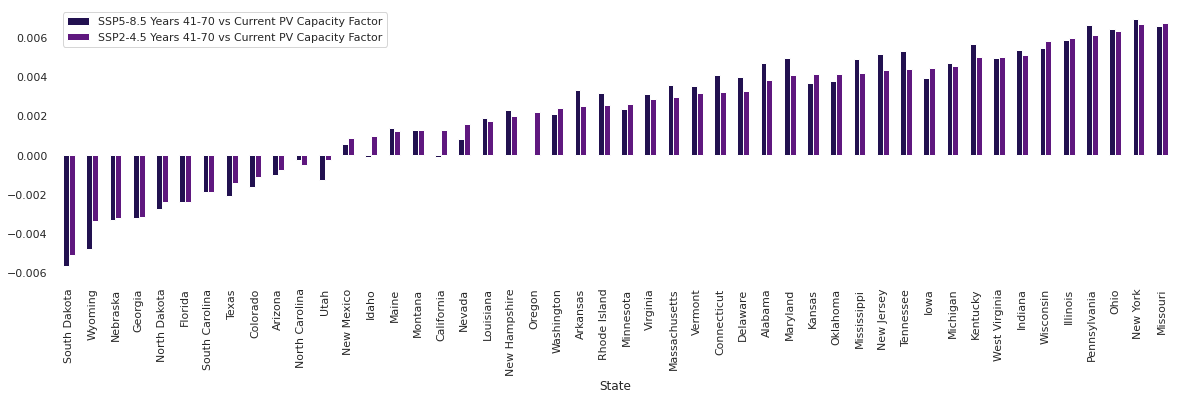

In [33]:
solar[['SSP5-8.5 Years 41-70 vs Current PV Capacity Factor','SSP2-4.5 Years 41-70 vs Current PV Capacity Factor']].sort_values('SSP2-4.5 Years 41-70 vs Current PV Capacity Factor').dropna().plot(kind='bar')
plt.savefig('pv_cap_dif.png')

In [8]:
wind['SSP5-8.5 Years 41-70 vs Current Wind Capacity Factor'] = wind['wind_5_41_70_Wind Capacity Factor_mean'] - wind['wind_normal_capacity_f_mean']
wind['SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor'] = wind['wind_ssp2_41_70_Wind Capacity Factor_mean'] - wind['wind_normal_capacity_f_mean']

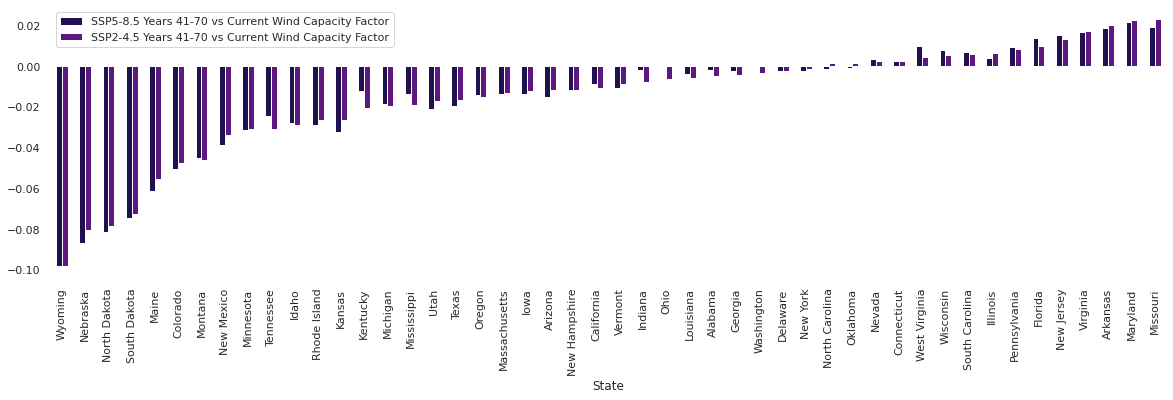

In [34]:
wind[['SSP5-8.5 Years 41-70 vs Current Wind Capacity Factor','SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor']].sort_values('SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor').dropna().plot(kind='bar')
plt.savefig('wind_cap_dif.png')

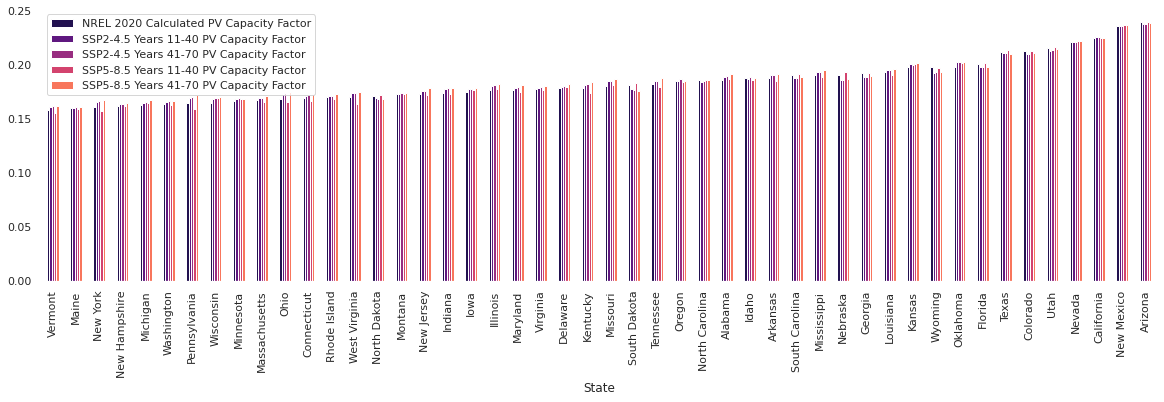

In [35]:
ss = solar[solar_mean_col]
ss = ss.rename({solar_mean_col[0]: 'SSP2-4.5 Years 11-40 PV Capacity Factor',
           solar_mean_col[1]: 'SSP5-8.5 Years 11-40 PV Capacity Factor',
           solar_mean_col[2]: 'NREL 2020 Calculated PV Capacity Factor',
           solar_mean_col[4]: 'SSP5-8.5 Years 41-70 PV Capacity Factor',
           solar_mean_col[5]: 'SSP2-4.5 Years 41-70 PV Capacity Factor',
           },axis=1).drop(solar_mean_col[3],axis=1)
ss = ss[['NREL 2020 Calculated PV Capacity Factor',
   'SSP2-4.5 Years 11-40 PV Capacity Factor',
    'SSP2-4.5 Years 41-70 PV Capacity Factor',
   'SSP5-8.5 Years 11-40 PV Capacity Factor',
    'SSP5-8.5 Years 41-70 PV Capacity Factor',
    ]]
ss.sort_values('NREL 2020 Calculated PV Capacity Factor',).dropna().plot(kind='bar')
plt.savefig('solar_caps.png')

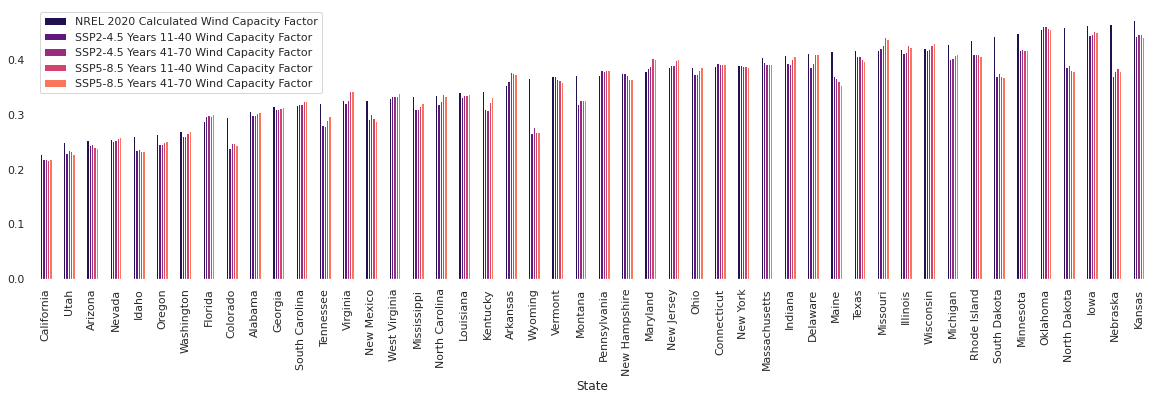

In [36]:
ss = wind[wind_mean_col]
ss = ss.rename({wind_mean_col[0]:'NREL 2020 Calculated Wind Capacity Factor',
           wind_mean_col[2]: 'SSP5-8.5 Years 41-70 Wind Capacity Factor',
           wind_mean_col[3]: 'SSP2-4.5 Years 41-70 Wind Capacity Factor',
           wind_mean_col[4]: 'SSP5-8.5 Years 11-40 Wind Capacity Factor',
           wind_mean_col[5]: 'SSP2-4.5 Years 11-40 Wind Capacity Factor',
           },axis=1).drop(wind_mean_col[1],axis=1)
ss = ss[['NREL 2020 Calculated Wind Capacity Factor',
   'SSP2-4.5 Years 11-40 Wind Capacity Factor',
    'SSP2-4.5 Years 41-70 Wind Capacity Factor',
   'SSP5-8.5 Years 11-40 Wind Capacity Factor',
    'SSP5-8.5 Years 41-70 Wind Capacity Factor',
    ]]
ss.sort_values('NREL 2020 Calculated Wind Capacity Factor').dropna().plot(kind='bar')
plt.savefig('wind_caps.png')